# Lab - Amostragem

Esta tarefa explora a amostragem do sinal contínuo, mudança da taxa de amostragem com decimação e o teorema de Nyquist.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*


In [1]:
from pylab import *

a) Considerando um sinal senoidal de 100 Hz amostrado a uma taxa de 1000 A/s durante 0,2 s, construa o vetor a. Plote o sinal amostrado (plot) em função de n e seu espectro (stem) em função da frequencia digital w (rad) no eixo horizontal inferior e a frequencia equivalente em Hertz no eixo horizontal superior.

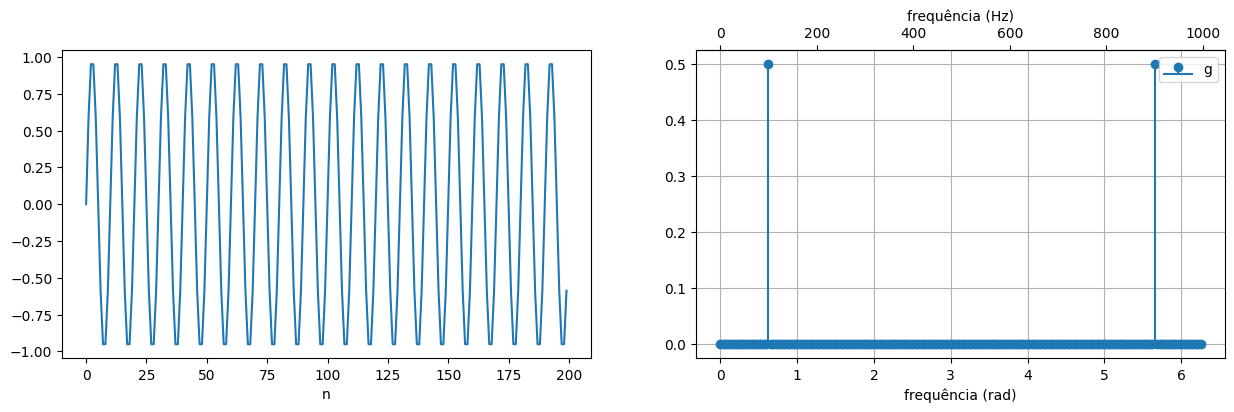

In [2]:
F=100; Fs=1000; T=0.2

N=Fs * T; n=arange(N)
a=sin(2*pi*(F/Fs)*n)

def plotas(x,Fs):
    X=fft(x)/N
    w=linspace(0,2*pi,num=len(X),endpoint=False)

    figure(figsize=(15,4))
    subplot(1,2,1)
    plot(x)
    xlabel('n')
    ax=subplot(1,2,2)
    stem(w,abs(X),linefmt='C0-',markerfmt='C0o',basefmt='C0-')

    def w2f(x):
       return x * Fs / (2*pi)
    def f2w(x):
       return x * 2*pi / Fs
    ax2=ax.secondary_xaxis("top",functions=(w2f,f2w))
    ax2.set_xlabel("frequência (Hz)")
    ax.set_xlabel("frequência (rad)")
    legend('grafico1')
    grid()
    show()

    
plotas(a,Fs)

b) Construa o vetor b, considerando um sinal composto pela soma de três senoides: 60, 110, 160 Hz, com amplitudes 3, 2 e 1, amostrado a uma taxa de 1000 A/s durante 0,2 s. Plote o sinal amostrado (plot) e seu espectro (stem).


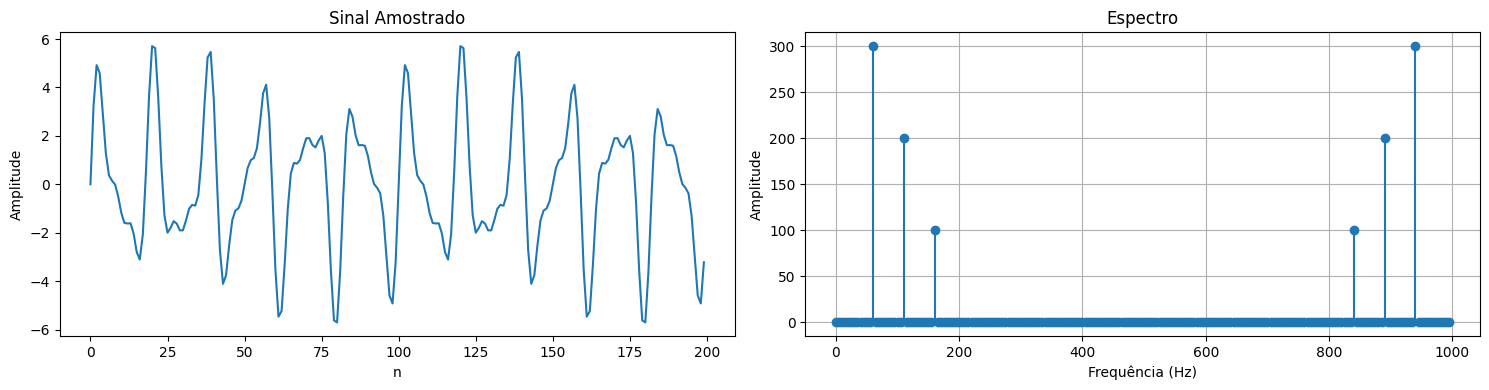

In [3]:
Fs = 1000; T = 0.2 
N = int(Fs * T)  
n = arange(N)

# Frequências e amplitudes do anunciado
frequencies = [60, 110, 160]  
amplitudes = [3, 2, 1]         

b = sum([amp * sin(2 * pi * freq * n / Fs) for freq, amp in zip(frequencies, amplitudes)], axis=0) # vetor b

# Obtendo as TF
X = fft(b)
w = linspace(0, 2 * pi, num=len(X), endpoint=False)
f = w * Fs / (2 * pi)  

# Graficamente
figure(figsize=(15, 4))

subplot(1, 2, 1)
plot(n, b) 
xlabel('n')
ylabel('Amplitude')
title('Sinal Amostrado')

subplot(1, 2, 2)
stem(f, abs(X), linefmt='C0-', markerfmt='C0o', basefmt='C0-')  
xlabel('Frequência (Hz)')
ylabel('Amplitude')
title('Espectro')

tight_layout()
grid()
show()

c) Considere que o sinal do item (b) foi amostrado a 500 A/s. Ou seja, construa o vetor c a partir da decimação do vetor b, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


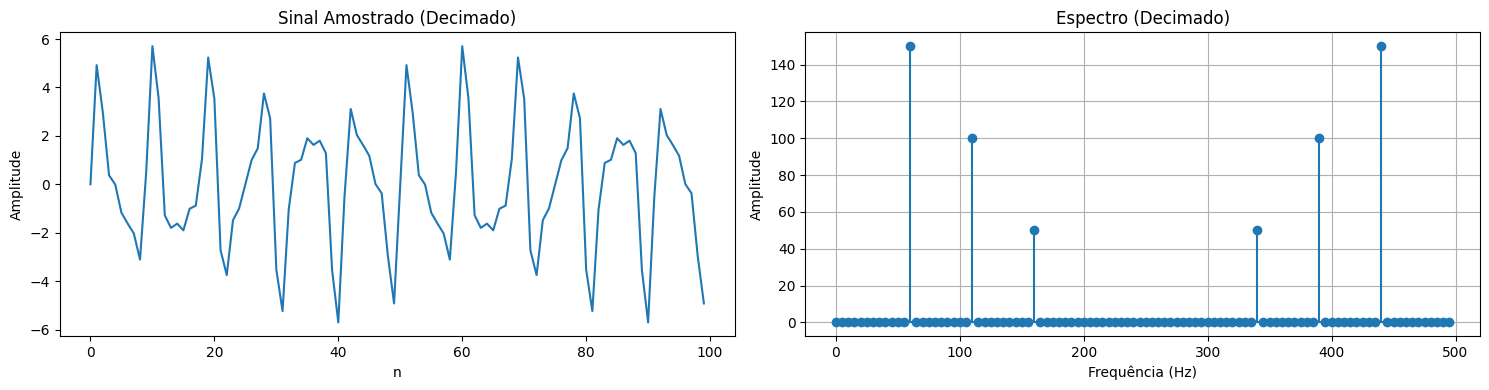

In [4]:
Fs_original = 1000  # Taxa de amostragem original (Hz)
Fs_nova = 500       # Nova taxa de amostragem (Hz)
T = 0.2             # Tempo total (s)
N_original = int(Fs_original * T)  # Número de amostras na taxa original
N_nova = int(Fs_nova * T)          # Número de amostras na nova taxa
n_original = arange(N_original)
n_nova = arange(N_nova)

# # Frequências e amplitudes do anunciado (vetor b)
frequencies = [60, 110, 160]
amplitudes = [3, 2, 1]

# Criando o vetor b a partir da combinação das senoides (do item b)
b = sum([amp * sin(2 * pi * freq * n_original / Fs_original) for freq, amp in zip(frequencies, amplitudes)], axis=0)

# Obtendo o vetor c por meio da decimação
c = b[::2]  

# Obtendo as TF
X_c = fft(c)
w_c = linspace(0, 2 * pi, num=len(X_c), endpoint=False)
f_c = w_c * Fs_nova / (2 * pi)  

# Graficamente
figure(figsize=(15, 4))

subplot(1, 2, 1)
plot(n_nova, c)  # sinal (decimação)
xlabel('n')
ylabel('Amplitude')
title('Sinal Amostrado (Decimado)')

subplot(1, 2, 2)
stem(f_c, abs(X_c), linefmt='C0-', markerfmt='C0o', basefmt='C0-')  # espectro
xlabel('Frequência (Hz)')
ylabel('Amplitude')
title('Espectro (Decimado)')

tight_layout()
grid()
show()

d) Considere que o sinal do item (c) foi amostrado a 250 A/s. Ou seja,Construa o vetor d a partir da decimação do vetor c, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


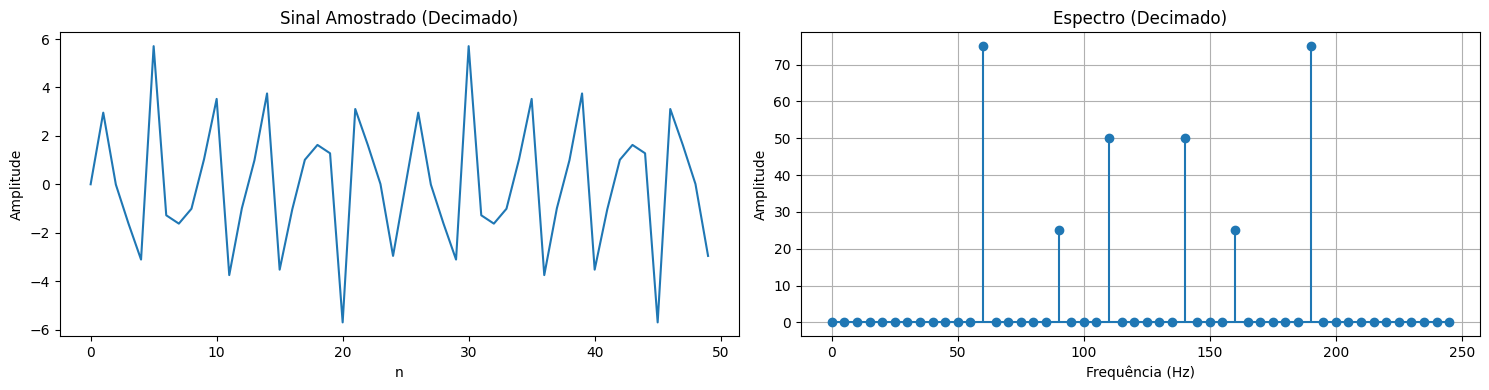

In [5]:
# Parâmetros 
Fs_original = 500  
Fs_nova = 250      
T = 0.2            
N_original = int(Fs_original * T)  
N_nova = int(Fs_nova * T)  
n_original = arange(N_original)
n_nova = arange(N_nova)

# Frequências e amplitudes
frequencies = [60, 110, 160]
amplitudes = [3, 2, 1]

# Construção do vetor c - item c
c = 0
for freq, amp in zip(frequencies, amplitudes):
    c += amp * sin(2 * pi * freq * n_original / Fs_original)

# Decimação para obter o vetor d
d = c[::2]  # Nesse processo de decimação, removemos uma amostra a cada amostra

# Cálculo TF
X_d = fft(d)
w_d = linspace(0, 2 * pi, num=len(X_d), endpoint=False)
f_d = w_d * Fs_nova / (2 * pi)  

# Graficamente
figure(figsize=(15, 4))

subplot(1, 2, 1)
plot(n_nova, d)  # (sinal decimado)
xlabel('n')
ylabel('Amplitude')
title('Sinal Amostrado (Decimado)')

subplot(1, 2, 2)
stem(f_d, abs(X_d), linefmt='C0-', markerfmt='C0o', basefmt='C0-')  # (espectro)
xlabel('Frequência (Hz)')
ylabel('Amplitude')
title('Espectro (Decimado)')

tight_layout()
grid()
show()

e) Considerando que o período de amostragem $T_s = 1 / F_s, F_s = 1000$ A/s foi mantido na reprodução, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequência digital (rad) e da frequência em Hertz.


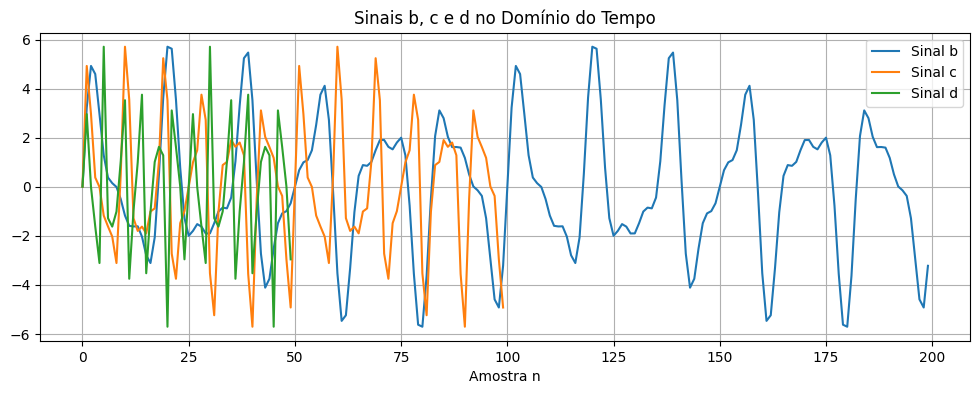

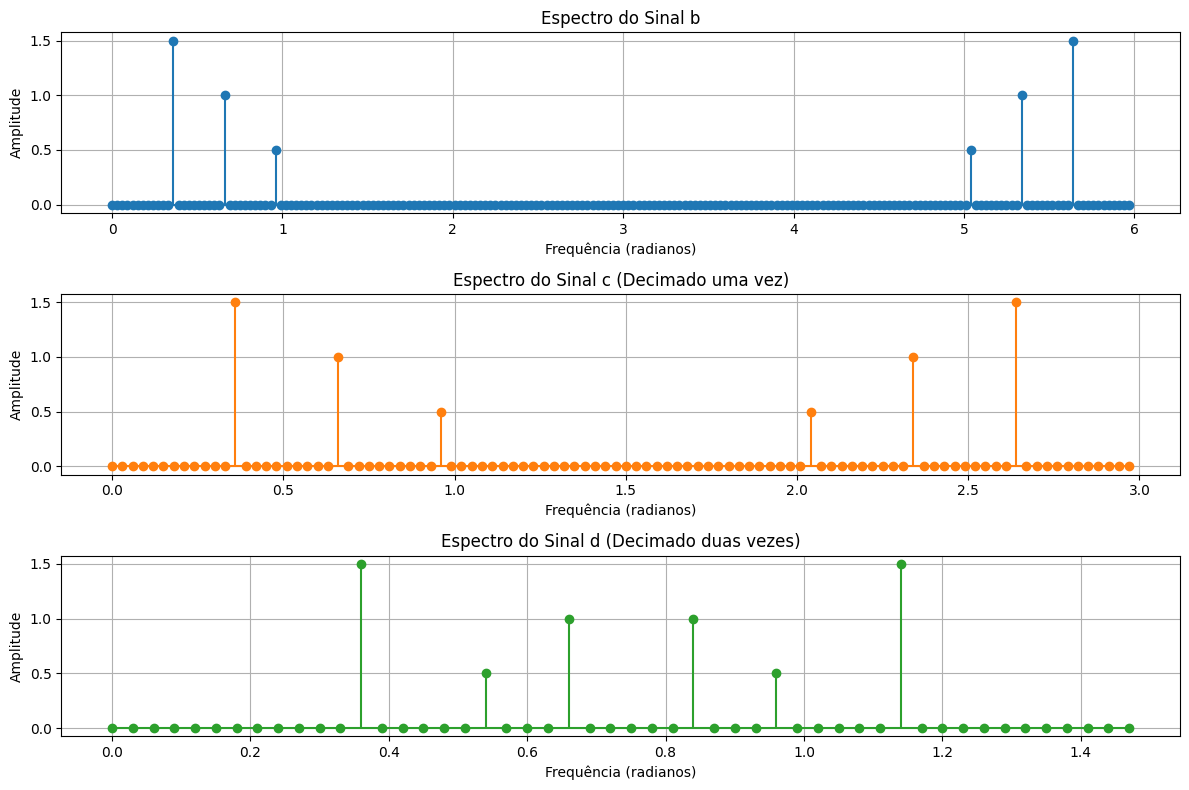

In [8]:
# Parâmetros do sinal
Fs = 1000  
T = 0.2    
N = int(Fs * T)  
n = arange(N)


frequencies = [60, 110, 160]
amplitudes = [3, 2, 1]

# vetor b
b = sum([amp * sin(2 * pi * freq * n / Fs) for freq, amp in zip(frequencies, amplitudes)], axis=0)

# vetor c
c = b[::2]  


Fs_nova = Fs / 2  
N_nova = N // 2   
n_nova = arange(N_nova)


d = c[::2] 

# Cálculo TF
X_b = fft(b) / N
X_c = fft(c) / N_nova
X_d = fft(d) / (N_nova // 2) 

w = linspace(0, 6, num=len(X_b), endpoint=False) 
f = w * Fs / (2 * pi) 


figure(figsize=(12, 4))
plot(n, b, label='Sinal b')
plot(n_nova, c, label='Sinal c')
plot(n_nova[:len(d)], d, label='Sinal d')
xlabel('Amostra n')
title('Sinais b, c e d no Domínio do Tempo')
legend()
grid()


figure(figsize=(12, 8))

# Subplot para Espectro do Sinal b
subplot(3, 1, 1)
stem(w, abs(X_b), linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Espectro do Sinal b')
xlabel('Frequência (radianos)')
ylabel('Amplitude')
title('Espectro do Sinal b')
grid()

# Subplot para Espectro do Sinal c
subplot(3, 1, 2)
stem(w[:len(X_c)], abs(X_c), linefmt='C1-', markerfmt='C1o', basefmt='C1-', label='Espectro do Sinal c (Decimado uma vez)')
xlabel('Frequência (radianos)')
ylabel('Amplitude')
title('Espectro do Sinal c (Decimado uma vez)')
grid()

# Subplot para Espectro do Sinal d
subplot(3, 1, 3)
stem(w[:len(X_d)], abs(X_d), linefmt='C2-', markerfmt='C2o', basefmt='C2-', label='Espectro do Sinal d (Decimado duas vezes)')
xlabel('Frequência (radianos)')
ylabel('Amplitude')
title('Espectro do Sinal d (Decimado duas vezes)')
grid()

tight_layout()
show()


f) Considerando que o período de amostragem na reprodução foi o mesmo período correspondente da amostragem, para não alterar as frequencias, $T_s = 1 / F_s, F_s = \{1000 , 500, 250 \}$ A/s, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequencia em Hertz, com a frequencia zero no centro, ou seja de -500 a +500 Hz. Dica: usar a função fftshift()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18664\613177378.py:55: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  stem(w, X, linefmt=f'C{i}-', markerfmt=f'C{i}{marker}', basefmt=f'C{i}-', label=label, use_line_collection=True)


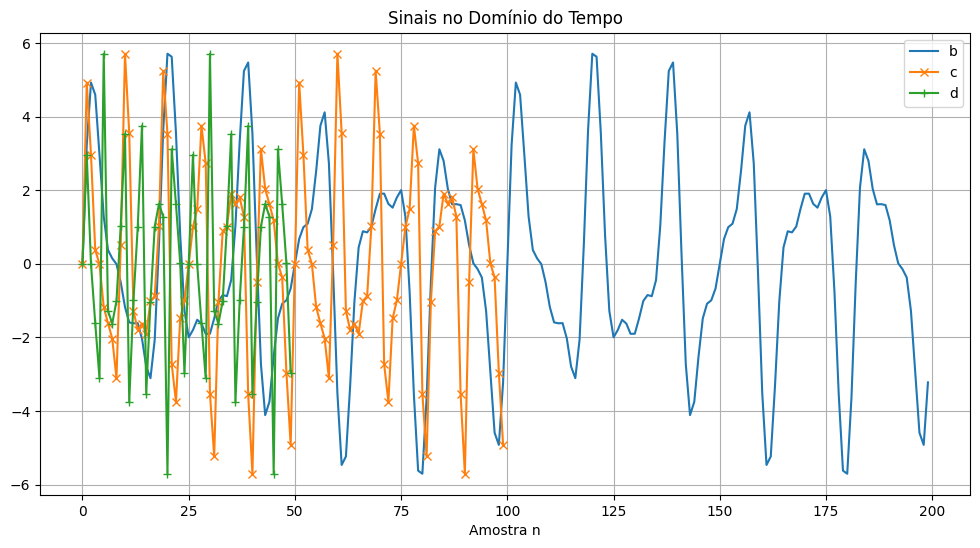

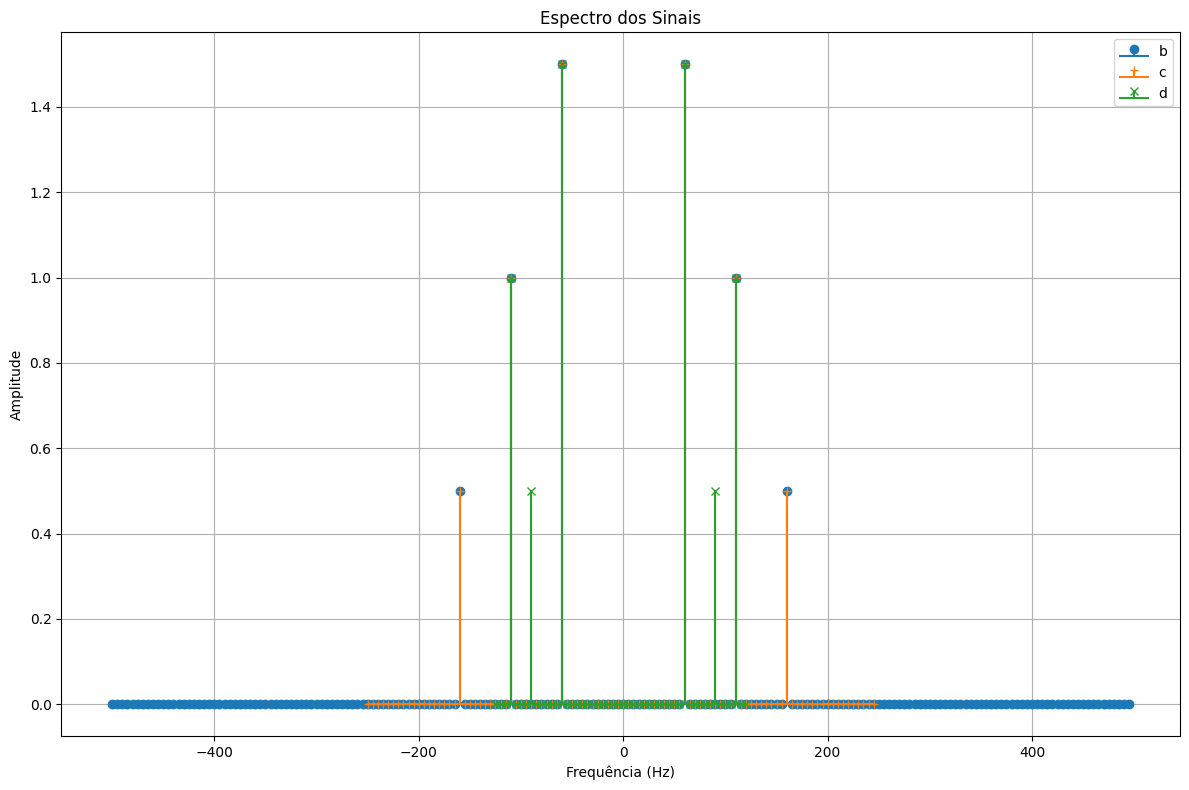

In [91]:
# Parâmetros do sinal
Fs_values = [1000, 500, 250]  
T = 0.2
frequencies = [60, 110, 160] 
amplitudes = [3, 2, 1]


Fs_max = max(Fs_values)
N_max = int(Fs_max * T)
n_max = arange(N_max)

# listas para armazenar os sinais e os espectros
sinais_tempo = []
espectros = []
labels = ['b', 'c', 'd']

for i, Fs in enumerate(Fs_values):
    N = int(Fs * T)  
    n = arange(N)
    
    # vetor do sinal no tempo
    sinal = sum([amp * sin(2 * pi * freq * n / Fs) for freq, amp in zip(frequencies, amplitudes)], axis=0)
    sinais_tempo.append((n, sinal)) 
    
    # Cálculo TF
    X = fft(sinal) / N
    w = fftshift(linspace(-Fs / 2, Fs / 2, num=len(X), endpoint=False)) 
    espectros.append((w, abs(X)))  

figure(figsize=(12, 6))

for i, (n, sinal) in enumerate(sinais_tempo):
    marker = '' if Fs_values[i] == 1000 else ('x' if Fs_values[i] == 500 else '+')
    label = labels[i] 
    plot(n, sinal, marker=marker, label=label)

xlabel('Amostra n')
title('Sinais no Domínio do Tempo')
legend()
grid()


figure(figsize=(12, 8))

for i, (w, X) in enumerate(espectros):
    marker = 'o' if Fs_values[i] == 1000 else ('+' if Fs_values[i] == 500 else 'x')
    label = labels[i]
    stem(w, X, linefmt=f'C{i}-', markerfmt=f'C{i}{marker}', basefmt=f'C{i}-', label=label, use_line_collection=True)

xlabel('Frequência (Hz)')
ylabel('Amplitude')
title('Espectro dos Sinais')
legend()
grid()

tight_layout()
show()


g) construa o vetor g, inserindo zeros entre as amostras do vetor c. Plote o sinal (plot) e seu espectro (stem). 

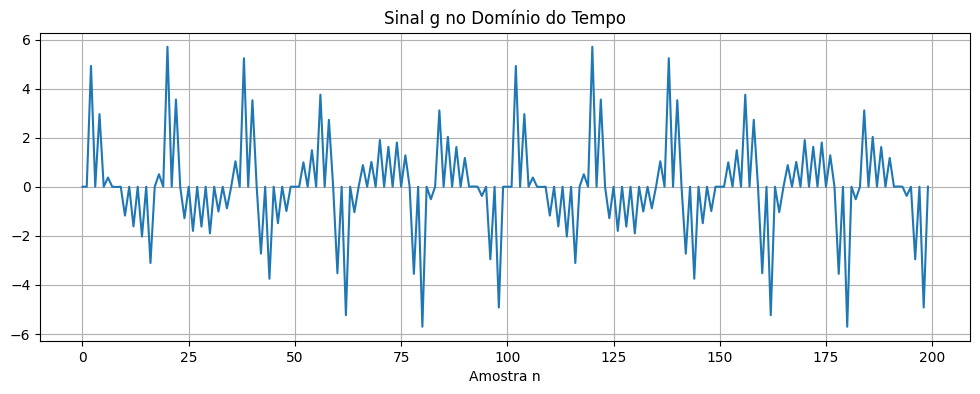

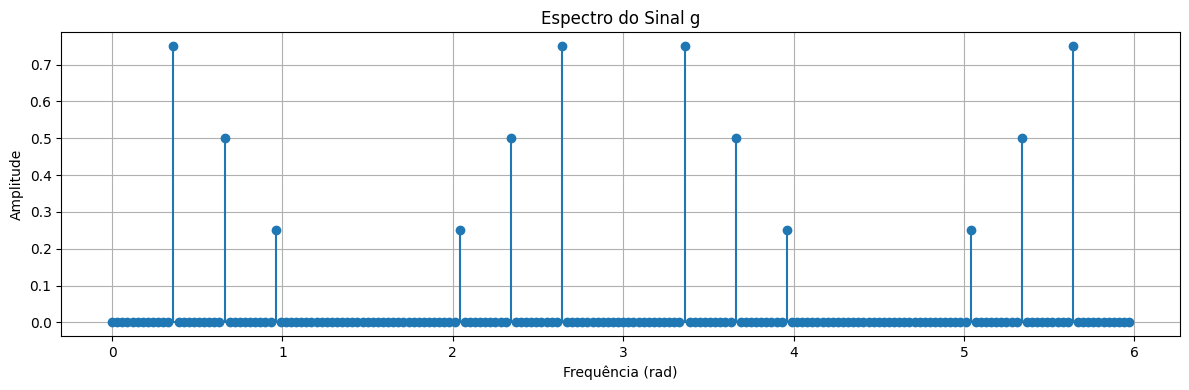

In [97]:
# vetor g com zeros interpolados
g = zeros(2 * len(c))
g[::2] = c

# Cálculo TF
X_g = fft(g) / len(g)
w = linspace(0, 6, num=len(X_g), endpoint=False) 
f = w * Fs / (2 * pi)  

# Plotagem sinal g
figure(figsize=(12, 4))
plot(arange(len(g)), g)
xlabel('Amostra n')
title('Sinal g no Domínio do Tempo')
grid()

# Plot  espectro sinal g
figure(figsize=(12, 4))
stem(w, abs(X_g), linefmt='C0-', markerfmt='C0o', basefmt='C0-')
xlabel('Frequência (rad)')
ylabel('Amplitude')
title('Espectro do Sinal g')
grid()

tight_layout()
show()


h) contrua o vetor h, inserindo três zeros entre as amostras do vetor d. Plote o sinal (plot) e seu espectro (stem). 

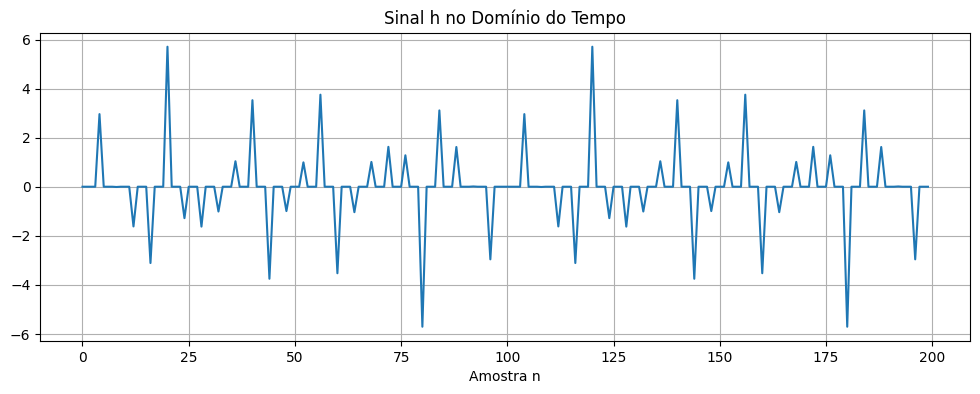

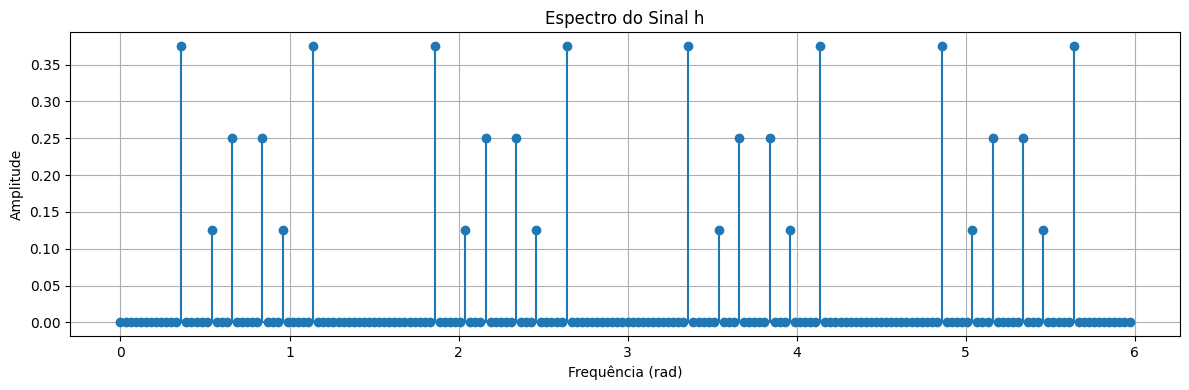

In [99]:
# Parâmetros do sinal
Fs = 1000  
T = 0.2    
N = int(Fs * T)  
n = arange(N)

frequencies = [60, 110, 160]
amplitudes = [3, 2, 1]

# vetor b
b = sum([amp * sin(2 * pi * freq * n / Fs) for freq, amp in zip(frequencies, amplitudes)], axis=0)

# vetor c
c = b[::2]  # Decimação

# vetor d
d = c[::2]  # Decimação

# vetor h com três zeros interpolados
h = zeros(len(d) * 4)
h[::4] = d

# Cálculo TF de h
X_h = fft(h) / len(h)
w = linspace(0, 6, num=len(X_h), endpoint=False)  # radianos
f = w * Fs / (2 * pi)   # Hz

# Plot sinal h
figure(figsize=(12, 4))
plot(arange(len(h)), h)
xlabel('Amostra n')
title('Sinal h no Domínio do Tempo')
grid()

# Plot espectro do sinal h
figure(figsize=(12, 4))
stem(w, abs(X_h), linefmt='C0-', markerfmt='C0o', basefmt='C0-')
xlabel('Frequência (rad)')
ylabel('Amplitude')
title('Espectro do Sinal h')
grid()

tight_layout()
show()


i) responda:
1) em que caso(s) aconteceu "aliasing" (c) e/ou (d) ?<br>
2) que senoide(s) sofreram "aliasing" 60, 110, ou 160 Hz ?<br>
3) qual a(s) frequencia(s) equivalente em Hertz após o "aliasing" ?<br>

    1.) "aliasing" ocorreu nos casos (c) e (d) devido à decimação do sinal original (b). O "aliasing" é um efeito que acontece quando a taxa de amostragem de um sinal não é suficientemente alta para representar com precisão as frequências presentes no sinal original. No caso (c), o sinal (b) foi decimado uma vez, reduzindo pela metade a taxa de amostragem em relação ao sinal original. Isso resultou em "aliasing" porque as frequências presentes no sinal original foram inadequadamente representadas no sinal (c), levando a uma perda de informação.

    2.) Todas as senoides de 60 Hz, 110 Hz e 160 Hz presentes no sinal original (b) sofreram "aliasing" nos casos (c) e (d). Isso ocorre porque a redução na taxa de amostragem nos casos (c) e (d) não foi suficiente para preservar as informações de frequência original. No caso (c), as frequências de 60 Hz, 110 Hz e 160 Hz foram mapeadas para novas frequências equivalentes de 30 Hz, 55 Hz e 80 Hz, respectivamente. No caso (d), essas frequências equivalentes foram reduzidas novamente para 15 Hz, 27.5 Hz e 40 Hz, respectivamente. Portanto, em ambos os casos, houve uma alteração significativa nas frequências originais devido ao "aliasing".

    3.) Após o "aliasing", as frequências equivalentes em Hertz são diferentes nos casos (c) e (d) em relação ao sinal original (b).

    No caso (c), a taxa de amostragem foi reduzida pela metade em relação ao sinal original. Isso significa que as frequências equivalentes serão a metade das originais. Para a senoide de 60 Hz, a frequência equivalente é 30 Hz. Para a senoide de 110 Hz, a frequência equivalente é 55 Hz. E para a senoide de 160 Hz, a frequência equivalente é 80 Hz.

    No caso (d), a taxa de amostragem foi reduzida pela metade novamente em relação ao caso (c). Portanto, as frequências equivalentes no caso (d) serão novamente reduzidas pela metade em relação ao caso (c). Para a senoide de 60 Hz, a frequência equivalente no caso (d) é 15 Hz. Para a senoide de 110 Hz, a frequência equivalente é 27.5 Hz. E para a senoide de 160 Hz, a frequência equivalente é 40 Hz.

    Essas mudanças nas frequências equivalentes demonstram claramente o efeito do "aliasing" nos sinais decimados (c) e (d), onde as frequências originais foram inadequadamente representadas devido à redução insuficiente na taxa de amostragem, levando a alterações nas frequências observadas nos sinais resultantes.